# Phase 1 (Data Cleaning Phase)

In [1]:
# 1. Import any required libraries.
import pandas as pd
import seaborn as sns

In [2]:
# 2. Read the csv file.
sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
# 3. Show the first five results.
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 4. Show if columns have any NaN, N/A or null values in boolean form.
sales.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [5]:
# 5. Check how many null, empty, N/A values there are in each column.
null_cols = sales.isnull().sum()
null_cols

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Sales has 16719 rows and 16 columns.


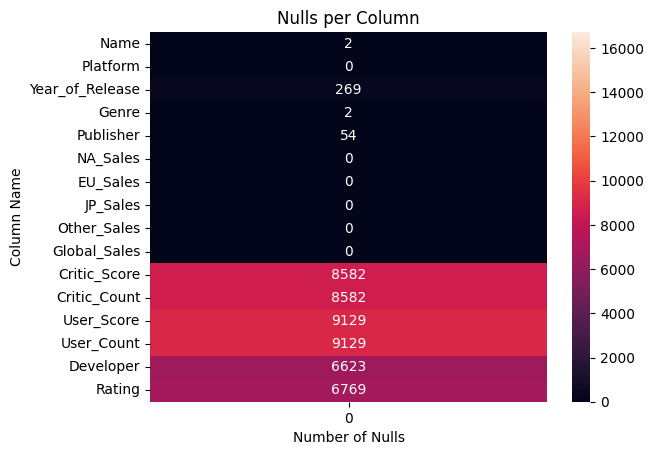

In [6]:
# 6. Show all null values in each column using a heatmap.
print(f"Sales has {sales.shape[0]} rows and {sales.shape[1]} columns.")
ax = sns.heatmap(pd.DataFrame(null_cols), vmax = sales.shape[0], annot = True, fmt = '')
ax.set(xlabel = "Number of Nulls", ylabel = "Column Name", title = "Nulls per Column");

In [7]:
# 7. Drop outliers. (Columns which are not useful)
sales = sales.drop(["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"], axis=1)

In [8]:
# 8. Drop the rows containing null values from the object created in point 7.
sales = sales.dropna(subset = ["Name", "Year_of_Release", "Genre", "Publisher"])

Sales has 16416 rows and 10 columns.


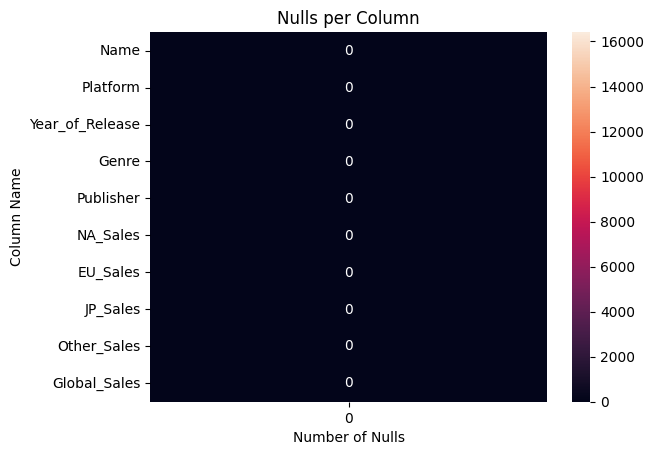

In [9]:
# 9. Check the dataframe again to see if there is anything else you want to remove.
print(f"Sales has {sales.shape[0]} rows and {sales.shape[1]} columns.")
null_cols2 = sales.isnull().sum()
ax2 = sns.heatmap(pd.DataFrame(null_cols2), vmax = sales.shape[0], annot = True, fmt = '')
ax2.set(xlabel = "Number of Nulls", ylabel = "Column Name", title = "Nulls per Column");

In [10]:
# 10. Export the dataframe to your desired location with no index column.
sales.to_csv("Video_Games_Sales_Cleaned.csv", index = False)